# FD&C Dye Content

This notebook creates three linear regression models to determine the dye content of several liquid samples.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

In [68]:
#Wavelength of maximum absorbance (nm)
blue_max = 630
red_max = 505
yellow_max = 429

#Molar mass of each dye (g/mol)
blue_mass = 791.84
red_mass = 496.42
yellow_mass = 534.30

#Molar absorptivities (L/ (mol * cm))
blue_eps = 1.05E5
red_eps = 2.50E4
yellow_eps = 2.12E4

def calc_mass(lr, absorbance, color, serving_size = 100):
    #Calculates the mass of the specified dye in a single serving
    #Requires the linear regression to have already been performed
    #Args:
        # lr: The linear regression model used to calibrate
        # Absorbance: a unitless reading from spectrophotometer
        # Color: a string of 'red', 'blue', or 'yellow'
        # Serving size: milliliters per serving of sample
              
    concentration = absorbance / lr.coef_[0]
    if color == 'blue':
        mass = serving_size * concentration * blue_mass 
        return(f'The mass of Blue 1 is {round(mass, 4)} mg.')
    elif color == 'red':
        mass = serving_size * concentration * red_mass
        return(f'The mass of Red 40 is {round(mass, 4)} mg.')
    else:
        mass = serving_size * concentration * yellow_mass
        return(f'The mass of Yellow 5 is {round(mass, 4)} mg.')
    

# Blue 1

In [4]:
blue = pd.read_csv('CSVs/Calibration/Blue 1 Calibration Curve for Pandas.csv')

In [5]:
blue = blue[['Wavelength (nm)', 'Abs', 'Concentration']]

In [6]:
blue['Wavelength (nm)'] = blue['Wavelength (nm)'].round(0)

In [7]:
blue_cal_df = blue[blue['Wavelength (nm)'] == blue_max]

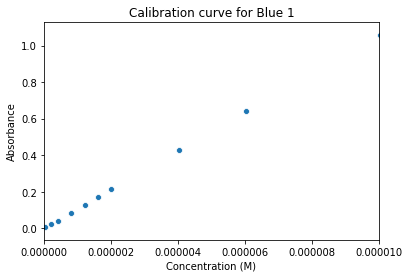

In [8]:
sns.scatterplot(data = blue_cal_df, x = 'Concentration', y = 'Abs')
plt.xlim(0, 1E-5)
plt.xlabel('Concentration (M)')
plt.ylabel('Absorbance')
plt.title('Calibration curve for Blue 1')
plt.show()

In [9]:
X_blue = np.array(blue_cal_df['Concentration']).reshape(-1, 1)
y_blue = blue_cal_df['Abs']
lr_blue = LinearRegression()
lr_blue.fit(X_blue, y_blue)
print(f'The R-Squared value for the Blue 1 calibration curve is {round(lr_blue.score(X_blue, y_blue), 5)}')

The R-Squared value for the Blue 1 calibration curve is 0.99998


In [94]:
lr_blue.coef_[0]

105430.95800879112

The linear regression has a great R-Squared score, and the coefficient is very close to the literature value for Blue 1's molar absorptivity (1.050E5).

# Red 40

In [10]:
red = pd.read_csv('CSVs/Calibration/Red Calibration Curve for Pandas.csv')

In [11]:
red['Wavelength'] =red['Wavelength'].round(0)

In [12]:
red_cal_df = red[red['Wavelength'] == red_max]

,Wavelength,Abs,Concentration
59,505.0,1.030879,3.990000e-05
180,505.0,0.506138,2.000000e-05
301,505.0,1.506775,5.990000e-05
422,505.0,1.232016,4.790000e-05
543,505.0,1.984208,7.990000e-05
664,505.0,0.097510,4.000000e-06
785,505.0,0.000936,3.990000e-09
906,505.0,0.208014,8.000000e-06
1027,505.0,0.417237,1.600000e-05


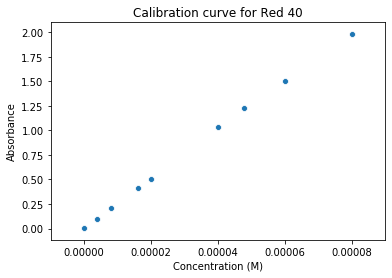

In [13]:
sns.scatterplot(data = red_cal_df, x = 'Concentration', y = 'Abs')
plt.xlim(-0.00001, 9E-5)
plt.xlabel('Concentration (M)')
plt.ylabel('Absorbance')
plt.title('Calibration curve for Red 40')
plt.show()

In [14]:
X_red = np.array(red_cal_df['Concentration']).reshape(-1, 1)
y_red = red_cal_df['Abs']
lr_red = LinearRegression()
lr_red.fit(X_red, y_red)
print(f'The R-Squared value for the Red 40 calibration curve is {round(lr_red.score(X_red, y_red), 5)}')

The R-Squared value for the Red 40 calibration curve is 0.99948


In [93]:
lr_red.coef_[0]

25010.511802115496

The linear regression has a great R-Squared score, and the coefficient is very close to the literature value for Red 40's molar absorptivity (2.50E4)

# Yellow 5

In [15]:
yellow = pd.read_csv('CSVs/Calibration/Yellow Calibration Curve for Pandas.csv')

In [16]:
yellow['Wavelength (nm)'] = yellow['Wavelength (nm)'].round(0)

In [17]:
yellow_cal_df = yellow[yellow['Wavelength (nm)'] == yellow_max]

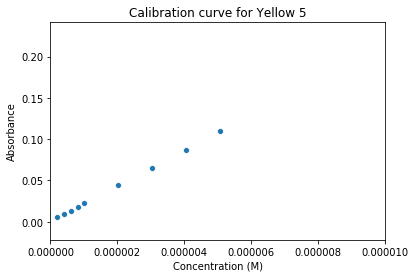

In [18]:
sns.scatterplot(data = yellow_cal_df, x = 'Concentration', y = 'Abs')
plt.xlim(0, 1E-5)
plt.xlabel('Concentration (M)')
plt.ylabel('Absorbance')
plt.title('Calibration curve for Yellow 5')
plt.show()

In [19]:
X_yellow = np.array(yellow_cal_df['Concentration']).reshape(-1, 1)
y_yellow = yellow_cal_df['Abs']
lr_yellow = LinearRegression()
lr_yellow.fit(X_yellow, y_yellow)
print(f'The R-Squared value for the Yellow 5 calibration curve is {round(lr_yellow.score(X_yellow, y_yellow), 5)}')

The R-Squared value for the Yellow 5 calibration curve is 0.99991


In [95]:
lr_yellow.coef_[0]

21207.759465370305

The linear regression has a great R-Squared score, and the coefficient is very close to the literature value for Yellow 5's molar absorptivity (2.12E4).

# Sample

For the sake of space, only one sample will be shown in this notebook. For full explanation of the calculations, you can view either the Appendix or the full paper in this repo.

In [96]:
mdew = pd.read_csv('CSVs/Samples/Mnt Dew.csv')

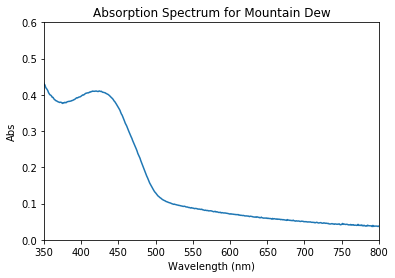

In [99]:
sns.lineplot(data = mdew, x = 'Wavelength (nm)', y = 'Abs')
plt.xlim(350, 800)
plt.ylim(0, 0.6)
plt.title('Absorption Spectrum for Mountain Dew')
plt.show()

In [100]:
mdew['Wavelength (nm)'] = mdew['Wavelength (nm)'].round(0)

We only care about the absorbance at 429 nm, since that is the lambda max for Yellow 5.

In [101]:
mdew_abs = list(mdew[mdew['Wavelength (nm)'] == yellow_max]['Abs'])[0]

First, I calculate the mass of Yellow 5 in 100 mL of sample.

In [102]:
calc_mass(lr = lr_yellow, absorbance = mdew_abs, color = 'yellow', serving_size = 100)

'The mass of Yellow 5 is 1.0252 mg.'

Then, I calculate the mass of Yellow 5 in one serving of Mountian Dew, which is 591 mL.

In [103]:
calc_mass(lr = lr_yellow, absorbance = mdew_abs, color = 'yellow', serving_size = 591)

'The mass of Yellow 5 is 6.0591 mg.'